In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
y_labels = []
with open('Chant data label.txt', encoding="utf-8") as f:
    for line in f:
        y_labels.append(int(line))

In [5]:
y_labels = np.array(y_labels)

In [6]:
y_labels

array([17, 15,  9,  7,  9,  9,  9, 14, 15, 19, 21, 20, 14, 15, 15, 10, 16,
       14, 16, 11, 18, 20, 18, 20, 21, 21, 20, 20, 20, 12])

In [8]:
num_classes = len(np.unique(y_labels))
num_classes

13

In [9]:
y_labels.dtype

dtype('int64')

In [14]:
y = keras.utils.to_categorical(y_labels, dtype='int64')

In [15]:
y.shape

(30, 22)

In [17]:
import os

directory = 'Chant_Data'

for i in range(1, 31):
    if i < 10:
        im_name = os.path.join(directory, f'{i:02}.png')
    else:
        im_name = os.path.join(directory, f'{i}.png')
    im_test = keras.utils.load_img(
        im_name,
        color_mode="grayscale",
        target_size=None,
        interpolation="bilinear",
        keep_aspect_ratio=False,
    )
    img = np.array(im_test)
    height, width = img.shape
    print(im_name, (height, width))

Chant_Data/01.png (106, 744)
Chant_Data/02.png (100, 806)
Chant_Data/03.png (100, 806)
Chant_Data/04.png (100, 806)
Chant_Data/05.png (100, 806)
Chant_Data/06.png (100, 806)
Chant_Data/07.png (100, 806)
Chant_Data/08.png (100, 806)
Chant_Data/09.png (100, 796)
Chant_Data/10.png (160, 1550)
Chant_Data/11.png (184, 1626)
Chant_Data/12.png (196, 1654)
Chant_Data/13.png (84, 642)
Chant_Data/14.png (84, 694)
Chant_Data/15.png (84, 694)
Chant_Data/16.png (84, 694)
Chant_Data/17.png (116, 710)
Chant_Data/18.png (116, 764)
Chant_Data/19.png (116, 764)
Chant_Data/20.png (116, 764)
Chant_Data/21.png (116, 700)
Chant_Data/22.png (100, 770)
Chant_Data/23.png (100, 770)
Chant_Data/24.png (100, 770)
Chant_Data/25.png (100, 770)
Chant_Data/26.png (100, 770)
Chant_Data/27.png (100, 770)
Chant_Data/28.png (100, 770)
Chant_Data/29.png (100, 770)
Chant_Data/30.png (100, 770)


Let's go with 80x600 as the modified image size

In [70]:
directory = 'Chant_Data'
imgs = []

for i in range(1, 31):
    if i < 10:
        im_name = os.path.join(directory, f'{i:02}.png')
    else:
        im_name = os.path.join(directory, f'{i}.png')
    im_test = keras.utils.load_img(
        im_name,
        color_mode="grayscale",
        target_size=(256, 256),
        interpolation="bilinear",
        keep_aspect_ratio=False,
    )
    img = np.array(im_test)
    height, width = img.shape
    imgs.append(img.reshape(height, width, 1))

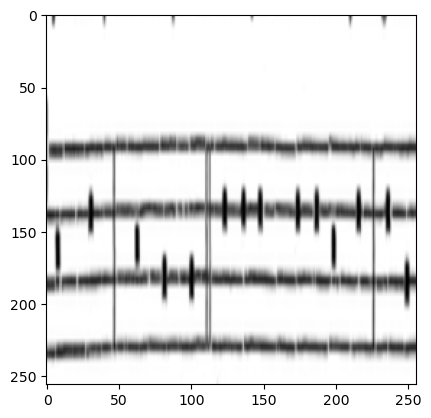

In [71]:
plt.imshow(np.array(imgs[7]), cmap='gray')

In [72]:
X = np.array(imgs)
X.shape

(30, 256, 256, 1)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [75]:
len(X_train), len(X_test), len(y_train), len(y_test)

(27, 3, 27, 3)

In [76]:
X_train.shape, X_test.shape

((27, 256, 256, 1), (3, 256, 256, 1))

In [77]:
y_test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [78]:
model = keras.models.Sequential()
model.add(keras.layers.Rescaling(1./255))
model.add(keras.layers.RandomFlip('vertical'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(22))

In [79]:
model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(np.array(X_train), np.array(y_train), batch_size=20, epochs=100, 
                    validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/100
2/2 [==============================] - 3s 619ms/step - loss: 8.8581 - accuracy: 0.0000e+00 - val_loss: 6.1676 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 2s 547ms/step - loss: 11.1358 - accuracy: 0.0000e+00 - val_loss: 7.3222 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 2s 549ms/step - loss: 5.1435 - accuracy: 0.0370 - val_loss: 10.7454 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 2s 549ms/step - loss: 11.3424 - accuracy: 0.0370 - val_loss: 10.7454 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 2s 552ms/step - loss: 10.9247 - accuracy: 0.0370 - val_loss: 6.2607 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 2s 546ms/step - loss: 10.2311 - accuracy: 0.0370 - val_loss: 5.3727 - val_accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 2s 549ms/step - loss: 9.5515 - accuracy: 0.0370 - val_loss: 6.700

2/2 [==============================] - 3s 729ms/step - loss: 5.9697 - accuracy: 0.0000e+00 - val_loss: 5.3727 - val_accuracy: 0.0000e+00
Epoch 56/100
2/2 [==============================] - 3s 708ms/step - loss: 5.9697 - accuracy: 0.0000e+00 - val_loss: 5.3727 - val_accuracy: 0.0000e+00
Epoch 57/100
2/2 [==============================] - 3s 666ms/step - loss: 5.9697 - accuracy: 0.0000e+00 - val_loss: 5.3727 - val_accuracy: 0.0000e+00
Epoch 58/100
2/2 [==============================] - 3s 711ms/step - loss: 5.9697 - accuracy: 0.0000e+00 - val_loss: 5.3727 - val_accuracy: 0.0000e+00
Epoch 59/100
2/2 [==============================] - 3s 840ms/step - loss: 5.9697 - accuracy: 0.0000e+00 - val_loss: 5.3727 - val_accuracy: 0.0000e+00
Epoch 60/100
2/2 [==============================] - 3s 838ms/step - loss: 5.9697 - accuracy: 0.0000e+00 - val_loss: 5.3727 - val_accuracy: 0.0000e+00
Epoch 61/100
2/2 [==============================] - 3s 763ms/step - loss: 5.9697 - accuracy: 0.0000e+00 - val_los

1/1 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - 49ms/epoch - 49ms/step


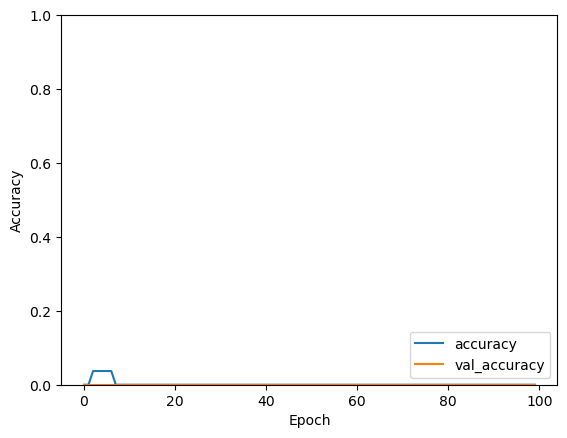

In [81]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, verbose=2)